# The Period of an Anharmonic Oscillator

This project models the anharmonic oscillator. An **anharmonic oscillator** is any oscillating system that does not follow a sypical harmonic oscillation pattern. For a simple harmonic oscillator, the potential well can be depicted as a $y = x^2$ parabola. In this case, the period is unaffected by the amplitude. However if the potential well has a different shape, for example $y = x^4$, the oscillation is onsedered anharmonic, and the period does depend on the amplitude.

### Controlling Equation:

\begin{equation*}
T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}
\end{equation*}

This equation gives the relationship between the period and the amplitude of a simple harmonic oscillator. V is the function that represents the potential well, and m is the mass of the oscillator.

### Scenerio:

Most types of oscillators become anharmonic when the oscillation is large, or when they are part of a coupled system. One example of an anharmonic system is a pendulum oscillating at large angles. At small angles, we can approximate the motion of a pendulum to be harmonic. However when the angle of a pendulum is large the forces acting on it do not simply act in the direction of motion, and the oscillation becomes anharmonic. Thus, when large angles are at play, the period becomes dependant on the amplidue. In this case, $V(x) = mgl(1-cos(\theta))$. This is approximately equal to $mglx^2$ at small angles by the small angle approximation.

#### Boundary conditions for the large angle pendulum

For a pendulum, it would not make sense for $\theta$ to be greater than $\pi$ radians or less than zero radians. And at these extremes, there is no oscillation, so the boundary conditions are 0 < $\theta$ < $\pi$.

### Deriving the Formula for Period vs Amplitude

\begin{equation*}
E = \frac{1}{2}m\big(\frac{dx}{dt}\big)^2 + V(x)
\end{equation*}

\begin{equation*}
E - V(x) = \frac{1}{2}m\big(\frac{dx}{dt}\big)^2
\end{equation*}

\begin{equation*}
\frac{2(E - V(x))}{m} = \big(\frac{dx}{dt}\big)^2
\end{equation*}

\begin{equation*}
\frac{dx}{dt} = \sqrt{\frac{2(E - V(x))}{m}}
\end{equation*}

\begin{equation*}
x = \int_{0}^{\frac{T}{4}}\sqrt{\frac{2(E - V(x))}{m}}dt
\end{equation*}

\begin{equation*}
x = \sqrt{\frac{2(E - V(x))}{m}} \frac{T}{4}
\end{equation*}

\begin{equation*}
T = \frac{4 \sqrt{m} x}{\sqrt{2(E-V(x))}}
\end{equation*}

\begin{equation*}
T = \sqrt{8m}\frac{x}{\sqrt{E-V(x)}}
\end{equation*}

$since \space E = V(a)$

\begin{equation*}
T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}
\end{equation*}


### Example of Calculating Period

In [2]:
%matplotlib inline
import math
import numpy as np
import pylab as plt
from romberg import romberg

def V (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^4 - the potential funciton"""
    
    return x**4

def integrationFunc (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V(amplitude)-V(x))
    
def periodCalculation (Vofx, mass, amplitude, tolerance):
    """Returns the period of the oscillator given an amplitude
    
    Arguements: Vofx - potential function
                mass - mass of the particle
                amplitude - amplitude of particle's oscillation
                tolerance - accuracy of integration
    
    Returned: period - the period of oscillation"""
    
    period = math.sqrt(8 * mass) * romberg(Vofx,(0,amplitude-1e-6),tolerance)
    
    return period
            

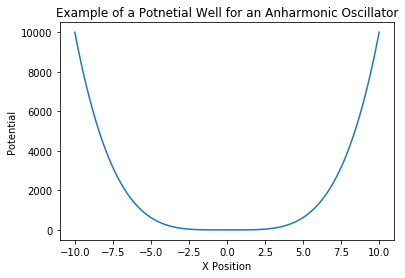

In [3]:
xPosition = []
potential = []

for i in np.linspace (-10, 10, 100):
    xPosition.append(i)
    potential.append(V(i))
    
plt.title("Example of a Potnetial Well for an Anharmonic Oscillator")    
plt.xlabel("X Position")
plt.ylabel("Potential")
plt.plot(xPosition, potential)

This plot is an example of the potential well for an anharmonic oscillator. Hamonic oscillators follow a parabolic potential well, with potential ~ $x^2$. This potenial well has potential ~ $x^4$, which causes the period to vary based on amplitude.

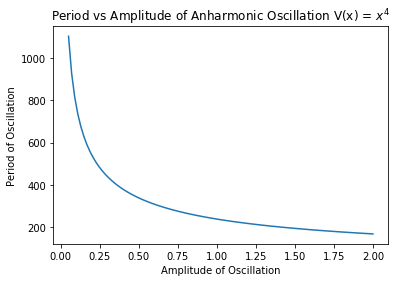

In [4]:
periods = []
amplitudes = []

# Creates period and amplitude arrays
for a in np.linspace (0.05, 2, 100): # Starts at 0.05 because the function approaches infinity as a -> 0
    amplitude = a
    periods.append(periodCalculation (integrationFunc, 1, a, 1e10))
    amplitudes.append(a)

plt.title("Period vs Amplitude of Anharmonic Oscillation V(x) = $x^4$")    
plt.xlabel("Amplitude of Oscillation")
plt.ylabel("Period of Oscillation")
plt.plot(amplitudes, periods)

The above plot shows how period depends on amplitude for an oscillator of mass = 1 (in arbitratry units) in a potential well of $V(x) = x^4$. We can see that the period increases as amplitude approaches zero, and approaches zero as the amplitude increases. This is because the potential at position x is equal to $x^4$. In a regular harmonic oscillator, the potential function is $x^2$, and the period is not affected by the amplitude. Compared to a harmonic potential well, a well that follows an $x^4$ pattern has a smaller slope as x approaches zero, and a larger slope when x is greater than one. This makes it so that when x is small, the change in potential is small, so one period will take longer. And when x is large, the change in potential is large, so one period will take less time. 

### Varying the Parameters

In [88]:
def VHarmonic (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^2 - the harmonic potential funciton"""
    
    return 1000000*x**2

def V1 (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^6 - the potential funciton"""
    
    return x**6

def V2 (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^8 - the potential funciton"""
    
    return x**8

def integrationFuncHarmonic (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(VHarmonic(amplitude)-VHarmonic(x))

def integrationFunc1 (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V1(amplitude)-V1(x))

def integrationFunc2 (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V2(amplitude)-V2(x))

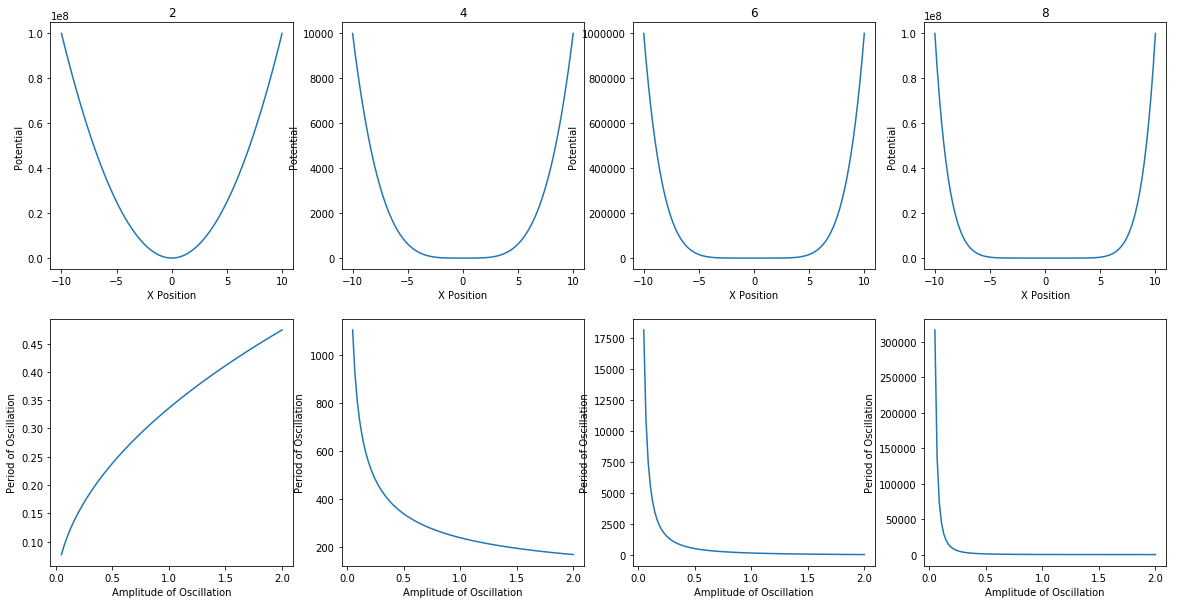

In [89]:
plt.figure(figsize = (20,10))

count = 0

for func in [VHarmonic, V, V1, V2]:
    xPosition = []
    potential = []
    
    count += 1

    for i in np.linspace (-10, 10, 100):
        xPosition.append(i)
        potential.append(func(i))
    
    ax = plt.subplot(2,4,count) 
    plt.title(count*2)
    plt.xlabel("X Position")
    plt.ylabel("Potential")
    plt.plot(xPosition, potential)

count = 0 

for func in [integrationFuncHarmonic, integrationFunc, integrationFunc1, integrationFunc2]:    
    
    periods = []
    amplitudes = []
    
    count += 1

    for a in np.linspace (0.05, 2, 100):
        amplitude = a
        periods.append(periodCalculation (func, 1, a, 1e10))
        amplitudes.append(a)

    ax = plt.subplot(2,4,count + 4)
    
    plt.xlabel("Amplitude of Oscillation")
    plt.ylabel("Period of Oscillation")
    plt.plot(amplitudes, periods)
    
    
plt.show()

The above plots show various potential wells allong with their corresponding plots of period vs amplitude. We can see that as the potential well gets steeper the greater dependancy the period of the oscillation has on the amplitude. 

### Analysis of Results

For the oscillator with the $x^4$ potential well, my period vs amplitude plot showed that the period increases steeply as amplitude approaches zero, and the period approaches zero as the amplitude increases. This is varified because it makes physical sense. Compared to the harmonic oscillator, the slope of the potential well is smaller towards x = 0 is smaller, so the oscillator would not move as fast, and when x > 1, the slope of the potential well is larger, so the oscillator would nove faster. This trend is further verified in the plots coresponding to $x^6$ and $x^8$.  
  
  The perameter I chose to vary was v(x). I tried out this integration on differently shaped potential wells. The higher the order of the potential well, the sharper the period vs amplitude curve was. One of the perameters I tried was $x^2$. Ideally this would give me a flat line since period is not dependant on amplitude for harmonic oscillators, however my model is a little off, because the formulat does not exactly match that of a harmonic oscillator, but it still follows the trend, because the period is less dependent on the amplitude. 

## Notes

### Real Life Examples:

Most systems are anharmonic when they are under extreme conditions. Here are some that might be interesting to study:  
https://journals.aps.org/pr/pdf/10.1103/PhysRev.184.1231  
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.47.1349  
http://digitalcommons.auctr.edu/cgi/viewcontent.cgi?article=1164&context=cauetds  

* Plasma  
    https://journals.aps.org/pr/pdf/10.1103/PhysRev.113.383
* Center of mass of a nucleus in an atom
* Crystal lattuces  
    https://journals.aps.org/pr/pdf/10.1103/PhysRev.144.411
* Acoustics
* Large angle Pendulum  
    http://www.scielo.org.mx/pdf/rmfe/v53n1/v53n1a13.pdf  
    https://www.youtube.com/watch?v=fBKZKQnJTY8 
* Nonequalibrium semi conductors  
    https://journals.aps.org/prb/pdf/10.1103/PhysRevB.37.1273
* Molecule movement  
    http://digitalcommons.linfield.edu/cgi/viewcontent.cgi?article=1026&context=physstud_theses